# Exploration des données de vent

In [2]:
import xarray as xr
import xesmf as xe
import hvplot.xarray
import pandas as pd
import os
import glob
import geopandas as gpd
from distributed import Client
import matplotlib.pyplot as plt

In [5]:
os.chdir('/Users/caramelo/Documents/0000_Unu_Engineering/wasabi_cloud_storage/gem/GDPS/GUST_MAX/')
grib_list_total=sorted(glob.glob('*.grib2'))
#grib_list=grib_list_total[0:7]
#grib_list

In [6]:
grib_list_total

['CMC_glb_GUST_MAX_TGL_10_latlon.24x.24_2021032500_P000.grib2',
 'CMC_glb_GUST_MAX_TGL_10_latlon.24x.24_2021032500_P003.grib2',
 'CMC_glb_GUST_MAX_TGL_10_latlon.24x.24_2021032500_P006.grib2',
 'CMC_glb_GUST_MAX_TGL_10_latlon.24x.24_2021032500_P009.grib2',
 'CMC_glb_GUST_MAX_TGL_10_latlon.24x.24_2021032500_P012.grib2',
 'CMC_glb_GUST_MAX_TGL_10_latlon.24x.24_2021032500_P015.grib2']

In [7]:
ds=xr.open_mfdataset(grib_list_total,concat_dim='valid_time',engine='cfgrib',combine='nested')

In [8]:
ds

<xarray.Dataset>
Dimensions:            (latitude: 751, longitude: 1500, valid_time: 6)
Coordinates:
    time               datetime64[ns] 2021-03-25
    step               (valid_time) timedelta64[ns] 00:00:00 ... 15:00:00
    heightAboveGround  int64 10
  * latitude           (latitude) float64 -90.0 -89.76 -89.52 ... 89.76 90.0
  * longitude          (longitude) float64 -180.0 -179.8 -179.5 ... 179.5 179.8
  * valid_time         (valid_time) datetime64[ns] 2021-03-25 ... 2021-03-25T...
Data variables:
    gust               (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 751, 1500), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal 
    history:                 2021-03-25T11:17:08 GRIB to CDM+CF via cfgrib-0....

In [9]:
ds.gust.attrs

{'GRIB_paramId': 260065,
 'GRIB_shortName': 'gust',
 'GRIB_units': 'm s**-1',
 'GRIB_name': 'Wind speed (gust)',
 'GRIB_cfVarName': 'gust',
 'GRIB_dataType': 'af',
 'GRIB_missingValue': 9999,
 'GRIB_numberOfPoints': 1126500,
 'GRIB_typeOfLevel': 'heightAboveGround',
 'GRIB_NV': 0,
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'max',
 'GRIB_gridType': 'regular_ll',
 'GRIB_gridDefinitionDescription': 'Latitude/longitude ',
 'GRIB_Nx': 1500,
 'GRIB_iDirectionIncrementInDegrees': 0.24,
 'GRIB_iScansNegatively': 0,
 'GRIB_longitudeOfFirstGridPointInDegrees': 180.0,
 'GRIB_longitudeOfLastGridPointInDegrees': 179.76,
 'GRIB_Ny': 751,
 'GRIB_jDirectionIncrementInDegrees': 0.24,
 'GRIB_jPointsAreConsecutive': 0,
 'GRIB_jScansPositively': 1,
 'GRIB_latitudeOfFirstGridPointInDegrees': -90.0,
 'GRIB_latitudeOfLastGridPointInDegrees': 90.0,
 'long_name': 'Wind speed (gust)',
 'units': 'm s**-1'}

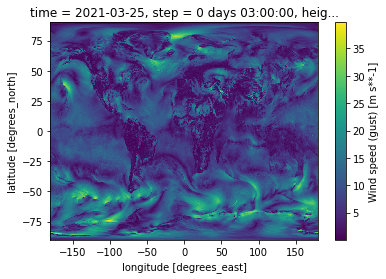

In [10]:
ds.gust.isel(valid_time=1).plot()

In [11]:
min_lon=-90
min_lat=40
max_lon=-55
max_lat=75

mask_lon= (ds.longitude >=min_lon) & (ds.longitude <=max_lon)
mask_lat= (ds.latitude >=min_lat) & (ds.latitude <=max_lat)

cropped_ds = ds.where(mask_lon & mask_lat, drop=True)
cropped_ds

<xarray.Dataset>
Dimensions:            (latitude: 146, longitude: 146, valid_time: 6)
Coordinates:
    time               datetime64[ns] 2021-03-25
    step               (valid_time) timedelta64[ns] 00:00:00 ... 15:00:00
    heightAboveGround  int64 10
  * latitude           (latitude) float64 40.08 40.32 40.56 ... 74.4 74.64 74.88
  * longitude          (longitude) float64 -90.0 -89.76 -89.52 ... -55.44 -55.2
  * valid_time         (valid_time) datetime64[ns] 2021-03-25 ... 2021-03-25T...
Data variables:
    gust               (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 146, 146), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal 
    history:                 2021-03-25T11:17:08 GRIB to CDM+CF via cfgrib-0....

<AxesSubplot:title={'center':'time = 2021-03-25, step = 0 days 03:00:00, heig...'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

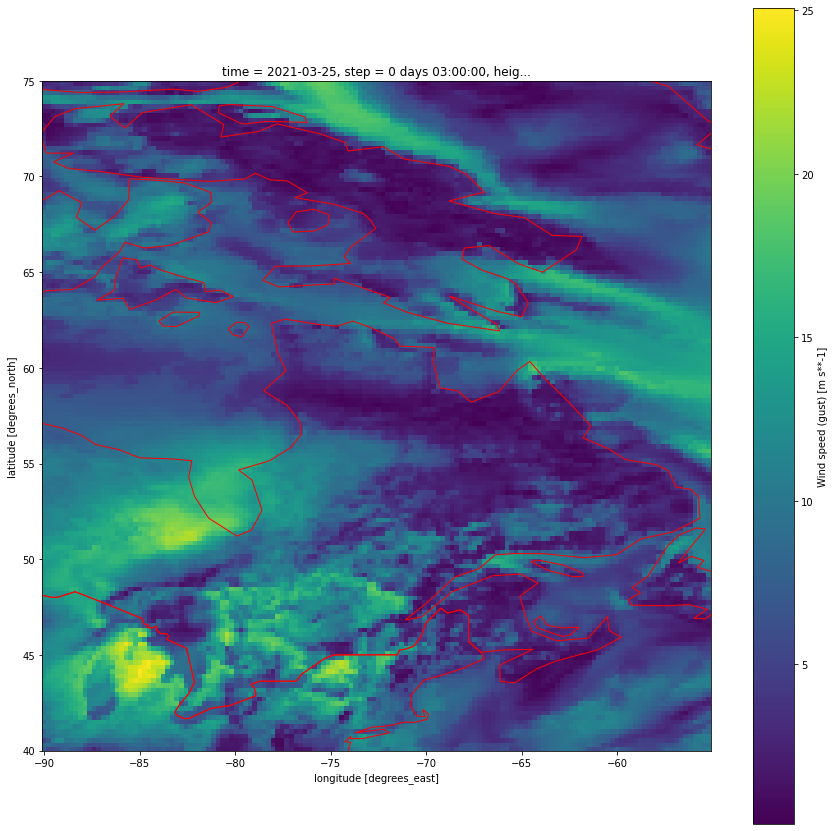

In [13]:
fig,ax=plt.subplots(figsize=(15,15))

countries=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cropped_ds.gust.isel(valid_time=1).plot(ax=ax)
countries.plot(ax=ax,facecolor='none',edgecolor='red')